# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.3MB/s eta 0:00:01
pyspark 2.2.1 requires py4j==0.10.4, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pd.__version__

u'0.20.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [5]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
movies.head()
#print(movies[movies.title == "Harry Potter"])

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [63]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()
print(cast[["year","name"]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB
         year                            name
0        2015                        Buffy #1
1        1985                          Homo $
2        2017                         $hutter
3        2015                         $hutter
4        2015                         $hutter
5        2015                         $hutter
6        2015                         $hutter
7        2009                    Bee Moe $lim
8        2014       Jori ' Danilo' Jurado Jr.
9        2014                Syaiful 'Ariffin
10       2014              Taipaleti 'Atu'ake
11       2015      Michael 'babeepower' Viera
12       1998      Michael 'babeepower' Viera
13       2000               Steven 'Bear'Boyd
14       2016 

In [70]:
#cast.tail(200)
cast.groupby(["type"]).count()

,title,year,name,character,n
type,,,,,
actor,2532681,2532681,2532681,2532681,1539800
actress,1253495,1253495,1253495,1253495,787803


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [9]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [10]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [11]:
len(movies)

244914

### List all Batman movies ever made

In [12]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

('Total Batman Movies:', 2)


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

('Total Batman Movies:', 35)


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [22]:
release_dates[release_dates.title.str.contains("Harry Potter")].sort_values(by=['date'],ascending=False)

,title,year,country,date
150239,Harry Potter and the Deathly Hallows: Part 2,2011,Zimbabwe,2012-03-01
150238,Harry Potter and the Deathly Hallows: Part 2,2011,Vietnam,2012-02-03
150237,Harry Potter and the Deathly Hallows: Part 2,2011,Cambodia,2011-08-25
150171,Harry Potter and the Deathly Hallows: Part 1,2010,Cambodia,2011-08-18
150236,Harry Potter and the Deathly Hallows: Part 2,2011,China,2011-08-04
150235,Harry Potter and the Deathly Hallows: Part 2,2011,Indonesia,2011-07-29
150234,Harry Potter and the Deathly Hallows: Part 2,2011,Pakistan,2011-07-22
150233,Harry Potter and the Deathly Hallows: Part 2,2011,Venezuela,2011-07-15
150232,Harry Potter and the Deathly Hallows: Part 2,2011,USA,2011-07-15
150231,Harry Potter and the Deathly Hallows: Part 2,2011,UK,2011-07-15


In [24]:
movies[movies.title.str.contains("Harry Potter")].sort_values(by=['year'],ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [17]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [33]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [40]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018) ])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [78]:
print(len(movies[movies.title == "Hamlet"]))
movies[movies.title == "Hamlet"]

20


,title,year
1931,Hamlet,2009
8214,Hamlet,1976
46344,Hamlet,1921
55639,Hamlet,2000
73869,Hamlet,1948
98326,Hamlet,1990
118535,Hamlet,1913
124506,Hamlet,1911
140203,Hamlet,1954
155004,Hamlet,1964


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [44]:
movies[(movies.title == "Hamlet") & (movies.year >=2000)].sort_values(by =['year'],ascending=False)

,title,year
244747,Hamlet,2017
191940,Hamlet,2016
186137,Hamlet,2015
178290,Hamlet,2014
227953,Hamlet,2011
1931,Hamlet,2009
55639,Hamlet,2000


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [30]:
sup_cast=cast[(cast.title.str.contains("Inception")) & cast.n.isnull() == True]
len(sup_cast)
print(sup_cast)


                                                     title  year  \
58474    Fraud in the Inception: Who killed Robert Haml...  2013   
98153                                            Inception  2010   
197877                                           Inception  2010   
374661                                           Inception  2010   
497161                                           Inception  2010   
684098                                           Inception  2010   
690634                                           Inception  2010   
707642                                           Inception  2010   
836295                                           Inception  2010   
1006636                                          Inception  2010   
1095095                                          Inception  2010   
1108755                                          Inception  2010   
1120184                                          Inception  2010   
1189066                                         

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [32]:
main_cast_ineption = cast[(cast.title == "Inception") & (cast.n.isnull() == False)].sort_values(by =['n'],ascending=False)
main_cast_ineption

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


In [83]:
len(main_cast_ineption)

2327603

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [63]:
cast[cast.n.isnull() == False].sort_values(by =['n'],ascending=False).iloc[0:10,2:]

,name,type,character,n
2711830,Marium Carvell,actress,Selma Davis,33613.0
3419397,Brittany Alexis Phillips,actress,Erica,999.0
2894187,Catherine Fitzlanders,actress,Matty,999.0
2015838,Roque (III) Santos,actor,Candy Seller,999.0
708300,Leon Fazzio,actor,Henry,999.0
2696184,Lisa Calvillo,actress,Spaghetti Spectator,938.0
2497900,Srikanth Yellapragada,actor,Himself,911.0
1573585,Frank Montella,actor,Pyotr Yeftushenko,910.0
580657,Gurunadh Desu,actor,Guru,811.0
3094387,Hsiang Kao,actress,Shang San Ku,788.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [70]:
cast[cast.character == "Albus Dumbledore"]

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [34]:
cast[(cast.character == "Albus Dumbledore")]["name"]

704984            Dane Farwell
792421          Michael Gambon
792423          Michael Gambon
792424          Michael Gambon
947789          Richard Harris
947790          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [40]:
cast[cast.name == "Keanu Reeves"].groupby(["name","character"]).count()


title  year  type  n
name         character                                 
Keanu Reeves Alex Wyler                1     1     1  1
             Bob Arctor                1     1     1  1
             Chevalier Danceny         1     1     1  1
             Chris Nadeau              1     1     1  1
             Chris Townsend            1     1     1  1
             Conor O'Neill             1     1     1  1
             Detective Galban          1     1     1  1
             Detective Tom Ludlow      1     1     1  1
             Dogstar                   2     2     2  2
             Don John                  1     1     1  1
             Donaka Mark               1     1     1  1
             Donnie Barksdale          1     1     1  1
             Dr. Beckham               1     1     1  1
             Eddie Kasalivich          1     1     1  1
             Evan                      1     1     1  1
             Griffin                   1     1     1  1
             Hank                      1     1     1  1
             Harry                     1     1     1  1
             Heaver                    1     1     1  1
             Henry Torne               1     1     1  1
             Himself                   1     1     1  1
             Jack Traven               1     1     1  1
             Jjaks Clayton             1     1     1  1
             John                      1     1     1  0
             John Constantine          1     1     1  1
             John Wick                 3     3     3  2
             Johnny Mnemonic           1     1     1  1
             Johnny Utah               1     1     1  1
             Jonathan Harker           1     1     1  1
             Julian Gitche             1     1     1  1
             Julian Mercer             1     1     1  1
             Kai                       1     1     1  1
             Keanu                     1     1     1  1
             Keanu Reeves              1     1     1  0
             Kevin Lomax               1     1     1  1
             Klaatu                    1     1     1  1
             Lucas Hill                1     1     1  1
             Marlon                    1     1     1  1
             Martin Loader             1     1     1  1
             Matt                      1     1     1  1
             Nelson Moss               1     1     1  1
             Neo                       3     3     3  3
             Ortiz the Dog Boy         1     1     1  0
             Paul Sutton               1     1     1  1
             Perry Lyman               1     1     1  1
             Ramsey                    1     1     1  1
             Ron Petrie                1     1     1  1
             Rupert Marshetta          1     1     1  1
             Scott Favor               1     1     1  1
             Shane Falco               1     1     1  1
             Siddhartha                1     1     1  1
             Ted                       2     2     2  2
             The Dream                 1     1     1  1
             Tod                       1     1     1  1
             Tommy Warneki             1     1     1  1
             Winston Connelly          1     1     1  1

In [87]:
name_Keanu_main_cast = cast[(cast.name == "Keanu Reeves") & (cast.year >= 1999) & (cast.n.isnull() == False)].sort_values(by =["year"])
name_Keanu_main_cast

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


In [88]:
len(name_Keanu_main_cast)

32

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [64]:
cast[((cast.type == "actor") | (cast.type == "actress")) & (cast.year >= 1950) & (cast.year <= 1960)].sort_values(by="year")[["year","type","character"]]

,year,type,character
3786094,1950,actress,Maria
3196093,1950,actress,Showgirl
960296,1950,actor,Bauernbursche
960306,1950,actor,Boy
960509,1950,actor,Wastl
960575,1950,actor,Waiter
960578,1950,actor,Fratzell
960595,1950,actor,Pawnbroker
960763,1950,actor,Mr. Denker
960773,1950,actor,Al Stern


In [65]:
cast[((cast.type == "actor") | (cast.type == "actress")) & (cast.year >= 2007) & (cast.year <= 2017)].sort_values(by="year")[["year","type","character"]]

,year,type,character
3267135,2007,actress,Mary
784234,2007,actor,Embassy Official
2845336,2007,actress,Josephine Hayden
325282,2007,actor,Pierrot
325278,2007,actor,Additional appearance
1177966,2007,actor,Officer Mahoney
3517968,2007,actress,Bride
2845322,2007,actress,Jacqueline de Rossy
1622850,2007,actor,Easy
784249,2007,actor,Bag seller


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [101]:
import datetime
import numpy as np
now = datetime.datetime.now()
leading=cast[(cast.n.isnull() == False) & (cast.year >=2000) & (cast.year <= now.year)].sort_values(by=["title","year"],ascending = False)
leading_cast = leading.groupby(["title"])
leading_cast.agg({"n":np.max})
#print(leading_cast)

,n
title,
#1 Serial Killer,25.0
#211,9.0
"#73, Shaanthi Nivaasa",12.0
#Captured,10.0
#FollowFriday,23.0
#Followme,7.0
#Horror,19.0
#Lucky Number,39.0
#REALITYHIGH,39.0


In [103]:
cast[(cast.title == "#Lucky Number")]

,title,year,name,type,character,n
228080,#Lucky Number,2015,Robert T. Bogue,actor,Vance Avery,10.0
391120,#Lucky Number,2015,Grizz Chapman,actor,Bouncer at Decadence,25.0
448651,#Lucky Number,2015,James Collins Jr.,actor,Roti,21.0
514599,#Lucky Number,2015,Joseph (II) D'Onofrio,actor,Blue Collar Mafia,14.0
570633,#Lucky Number,2015,William DeMeo,actor,Blue Collar Mafia,19.0
574903,#Lucky Number,2015,Ron Denson,actor,Football Player,NaN
577551,#Lucky Number,2015,Stephen DeRosa,actor,Ma?tre D',22.0
683476,#Lucky Number,2015,Eric W. Espinosa,actor,Referee,NaN
690982,#Lucky Number,2015,Bobby (II) Evers,actor,Wall Street D-Bag,32.0
704696,#Lucky Number,2015,Robert Farrior,actor,Gus Jacobson,13.0


In [ ]:
cast[(cast.n.isnull() == True) & (cast.year >=2000) & (cast.year <= now.year)].sort_values(by="year",ascending = False)

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [15]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Honeymoon               11
The Three Musketeers    11
Freedom                 11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

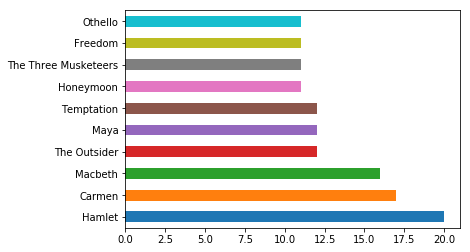

In [16]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

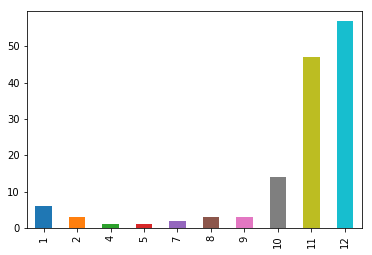

In [17]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?